一般机器学习的实现大致步骤如下：
- 1、准备数据，包括数据的收集，整理等
- 2、定义一个学习模型，也就是最后用来预测其他数据的模型
- 3、定义损失函数
- 4、选择一个优化策略（optimizer）,用来根据损失不断优化模型参数
- 5、根据训练数据训练模型
- 6、根据测试数据求模型预测的准确率。

logistic回归模型是对特征做加权相加后结果输入给Sigmoid函数，经过Sigmoid函数后的输出用来确定二分类的结果
Logistic回归的优点在于计算代价不高，容易理解和实现，缺点是很容易造成欠拟合，分类的精度不高，还有一个很重要的地方是
神经网络中的一个神经元其实可以理解为一个Logistic回归模型


Sigmoid函数$f(x) = \frac{1}{1+e^{-x}}$

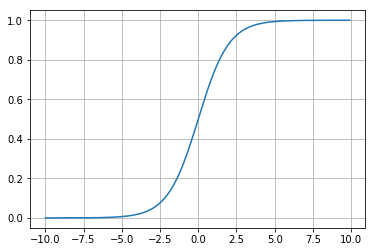

In [2]:
### Sigmoid函数
#Sigmoid函数曾被广泛第应用，但由于其自身的一些缺陷，现在很少被使用了，
#对应的图像如下：

%matplotlib inline
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = [sigmoid(i) for i in x]
plt.figure()
plt.plot(x,y)
plt.grid(True)
plt.show()

Logistic回归选择Sigmoid是因为他是0.5中心对称的，所以只需要将它的输出大于0.5的数据分为“1”类，小与0.5的数据
作为“0”类，就这样实现了二分类问题
确定了Sigmoid函数输出那Sigmoid函数的输入有时什么呢

其实只是每一个特征都作一个加权，然后把所有的结果相加，定义Sigmoid函数的输入为z：
那么
$z = w_{0}x_{0}+w_{1}x_{1}+\cdots +w_{n}x_{n}$

即$z = w^Tx$

所以Logistic回归模型的形式可以写成：

$
\begin{aligned}
h_{w}(x) =&g(w^{T}x)\\
=&\frac{1}{1+e^{-w^Tx}}
\end{aligned}
$

模型确定后剩下就是求解模型中的参数$w$，而在已知模型和一定样本的情况下，估计模型参数在统计学
中常用的是极大似然估计方法，即找到一组参数$w$使得在这组参数下样本数据的似然度（概率）最大
对于Logistic回归模型，假定的概率分布式伯努利分布，根据伯努利分布的定义，其概率函数是：

$p(X=n)=1-p， n = 0$

$p(X=n)=p， n = 1$

![](./pics/logistic.png)

下图可以很直观的解释为什么要用对数似然（交叉熵损失）

[[0.25 0.25 0.25 0.25]
 [0.01 0.01 0.01 0.96]]
Cross entropy loss is :0.7135329699138555
1e-10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


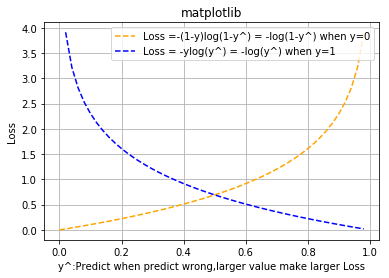

In [6]:
#encoding=utf-8
 

import matplotlib.pyplot as plt
import numpy as np
import numpy as np
predictions = np.array([[0.25,0.25,0.25,0.25],[0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],[0,0,0,1]])
def cross_entropy(predictions,targets,epsilon=1e-10):
    predictions = np.clip(predictions,epsilon,1.-epsilon)
    print(predictions)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss = cross_entropy(predictions, targets)
print("Cross entropy loss is :" + str(cross_entropy_loss))
print(1e-10)


x = np.arange(0,1,0.02)
y = -np.log(1-x)
z = -np.log(x)
# marker数据点样式，linewidth线宽，linestyle线型样式，color颜色
plt.plot(x, y,  linestyle="--", color="orange")
plt.plot(x, z,  linestyle="--", color="blue")
plt.title("matplotlib")
plt.xlabel("y^:Predict when predict wrong,larger value make larger Loss")
plt.ylabel("Loss")
# 设置图例
plt.legend(["Loss =-(1-y)log(1-y^) = -log(1-y^) when y=0","Loss = -ylog(y^) = -log(y^) when y=1 "], loc="upper right")
plt.grid(True)
plt.show()

为什么要用交叉熵做损失因为它会惩罚置信度很高（概率很大）但是错误的值，这样损失不断减小的过程中预测结果就越准确，比如，真实标签是y=1的时候Loss = -y(log(y^) ) = -log(y^) ，这时候是个减函数，y^越接近0，Loss越大（因为实际是1，预测越接近0，损失就越大）